# Dynamical Systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"

Consider the vector field given by

$$
\begin{align}
    \dot{x} &= y\\
    \dot{y} &= -x
\end{align}
$$

It can be shown that its solutions are given by

$$
\begin{align}
    x(t) &= x_0\cos(t - t_0) + y_0\sin(t -t_0)\\
    y(t) &= -x_0\sin(t - t_0) + y_0\cos(t -t_0)\\
\end{align}
$$

In [3]:
t = np.linspace(0, 2 * np.pi - 0.7, 100)

t0, x0, y0 = 0, 3, 1
def x(t): return x0 * np.cos(t - t0) + y0 * np.sin(t - t0)
def y(t): return -x0 * np.sin(t - t0) + y0 * np.cos(t - t0)

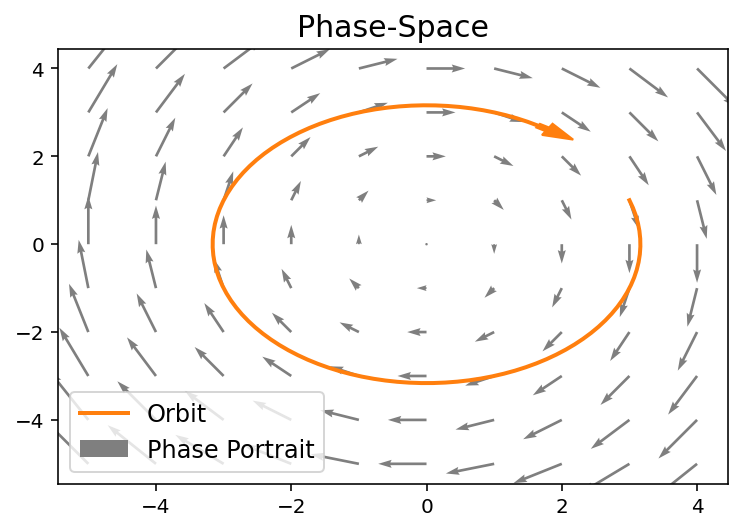

In [4]:
X, Y = np.mgrid[-5:5:1, -5:5:1]
X_dot = Y
Y_dot = -X

plt.quiver(X, Y, X_dot, Y_dot, color="tab:gray", width=0.004,
           label="Phase Portrait")
plt.plot(x(t), y(t), linewidth=2, c="tab:orange",
         label="Orbit")

x_last, y_last = x(t)[-1], y(t)[-1]
plt.arrow(x_last, y_last, y_last / 20, -x_last / 20,
          width=0.1, color="tab:orange")

plt.legend(fontsize=12)
plt.title("Phase-Space", fontsize=15);

### A second example

Writing a second order-ODE into a sytem of first-order ODEs:

$$
    a\ddot x + b \dot x + cx = 0
$$

Can be written as

$$
\begin{aligned}
    \dot x_1 &= x_2\\
    \dot x_2 &= -\frac{b}{a}x_2 - \frac{c}{a}x_1
\end{aligned}
$$

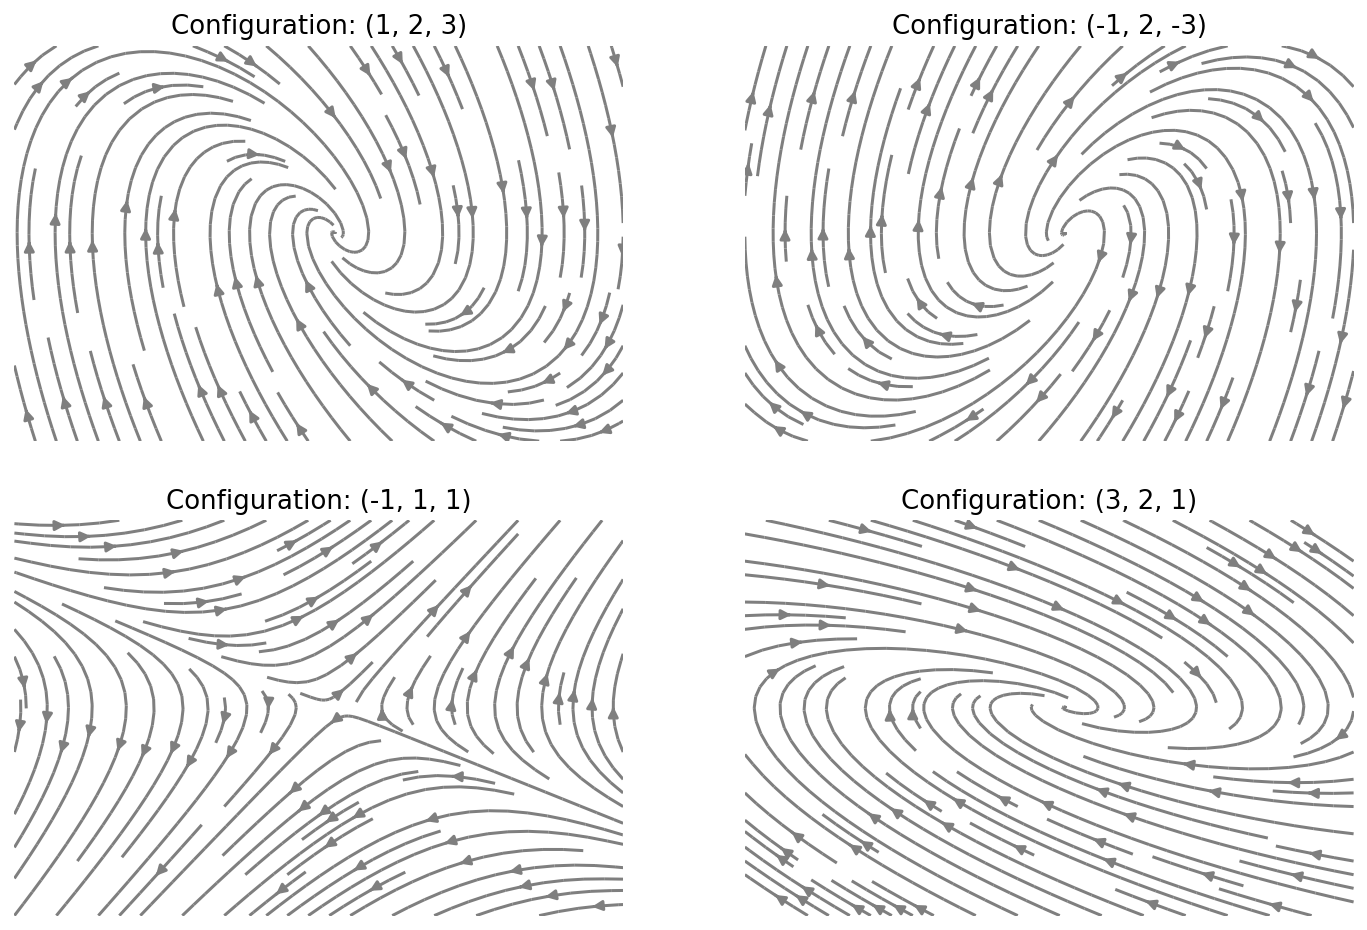

In [5]:
Y, X = np.mgrid[-5:5:0.5, -5:5:0.5]
a, b, c = 4, 2, 3

def dynamical_system(X, Y, a, b, c):
    X_dot = Y
    Y_dot = - b / a * Y - c / a * X
    
    return X_dot, Y_dot

configurations = [(1, 2, 3), (-1, 2, -3), (-1, 1, 1), (3, 2, 1)]

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.ravel()
for (a, b, c), axi in zip(configurations, ax):
    X_dot, Y_dot = dynamical_system(X, Y, a, b, c)
    axi.streamplot(X, Y, X_dot, Y_dot, color="tab:gray")
    axi.set_title(f"Configuration: {(a, b, c)}", fontsize=13)
    axi.axis("off");